** Question 1:** What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

 -  Anomaly Detection is a technique in Machine Learning used to identify data points that are unusual, unexpected, or suspicious compared to normal patterns.

 - Used in: fraud detection, network security, sensor data, bank transactions, manufacturing, etc.

# **Types with example**

| **Type of Anomaly**    | **Meaning**                                                                          | **Example**                                                          | **Where Used**                          |
| ---------------------- | ------------------------------------------------------------------------------------ | -------------------------------------------------------------------- | --------------------------------------- |
| **Point Anomaly**      | A single data point is very different from all other points.                         | Daily expenses: `200, 250, 300, 280, 5000` → **5000 is an anomaly**  | Fraud detection, transaction monitoring |
| **Contextual Anomaly** | A data point that is abnormal **only in a specific context** (time/season/location). | Temperature: **30°C** in **winter** (anomaly), but normal in summer. | Time-series, sensor data, weather data  |
| **Collective Anomaly** | A group of data points together is abnormal, even if individual points are normal.   | Server requests: `300, 320, 310, 330` → collectively indicate attack | Network intrusion, sequence logs        |

---

**Question 2:** Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

 - | **Algorithm**                  | **Approach (How it works)**                                                                             | **Best Use Cases**                                                   | **Advantages**                                                      | **Limitations**                                             |
| ------------------------------ | ------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------- | ------------------------------------------------------------------- | ----------------------------------------------------------- |
| **Isolation Forest**           | Randomly splits the data to **isolate** points. Anomalies get isolated faster → fewer splits = anomaly. | High-dimensional data, large datasets, fraud detection, server logs  | Fast, scalable, works well with high dimensions, model-based        | Not great with very dense clusters or complex shapes        |
| **DBSCAN**                     | Density-based: points in **low-density regions** are labeled as anomalies.                              | Spatial data, clustering + anomaly detection, GPS data, image data   | Detects clusters of any shape, no need for number of clusters       | Struggles with varying densities, sensitive to eps/minPts   |
| **Local Outlier Factor (LOF)** | Compares **local density** of a point to its neighbors. Lower density → anomaly.                        | Local anomalies, datasets where anomalies are subtle in neighborhood | Good for local pattern anomalies, works well for complex structures | Not scalable for large datasets, sensitive to k (neighbors) |

---



**Question 3:** What are the key components of a Time Series? Explain each with one example.

 - A Time Series is data collected over time at regular intervals

 - It is mainly made of 4 components:

 **1. Trend (T)**

**Meaning:**
Long-term upward or downward movement in the data.

**Example:**
Sales of mobile phones increasing every year due to higher demand.


**2. Seasonality (S)**

**Meaning:**
A repeating pattern at fixed time intervals (daily, monthly, yearly).

**Example:**
Ice-cream sales increase every summer and drop in winter every year.

**3. Cyclic Component (C)**

**Meaning:**
Long-term cycles caused by economic/business factors.
Unlike seasonality, the duration is not fixed.

**Example:**
Share market shows cycles of growth → recession → recovery, but not with a fixed time gap.

**4. Irregular/Random Component (R)**

**Meaning:**
Unexpected, unpredictable variations.

**Example:**
Sudden drop in restaurant sales due to a 1-day storm.

---

**Question 4:** Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

 - A time series is stationary when its mean, variance, and overall pattern remain constant over time.
 - No trend, no seasonality.

# **How to Test Stationarity ?**

1. **ADF Test (Augmented Dickey-Fuller Test)**

 - Most commonly used test.

 - p-value < 0.05 → Stationary

 - p-value ≥ 0.05 → Not Stationary

2. **KPSS Test**

 - Opposite of ADF.

 - p-value < 0.05 → Not Stationary

 - p-value ≥ 0.05 → Stationary

3. **Visual Methods**

 - Plotting the series and checking if:

 - Trend exists

  - Seasonality exists

 - Variance changes

If yes → Non-stationary

# **How to Make a Series Stationary**

 1. Differencing (Yₜ − Yₜ₋₁)

 2. Seasonal differencing (Yₜ − Yₜ₋₁₂)

 3. Log transform

 4. Detrending

---

**Question 5:** Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

 - | Model       | Full Form                                 | Structure             | What It Uses                                   | When To Use (Application)                                                                       |
| ----------- | ----------------------------------------- | --------------------- | ---------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **AR**      | Auto-Regressive                           | AR(p)                 | Past values of the series                      | When future depends on **previous observations** only.                                          |
| **MA**      | Moving Average                            | MA(q)                 | Past error terms (residuals)                   | When noise/error patterns affect future values.                                                 |
| **ARIMA**   | Auto-Regressive Integrated Moving Average | ARIMA(p,d,q)          | AR + differencing + MA                         | For **non-seasonal** data with **trend**.                                                       |
| **SARIMA**  | Seasonal ARIMA                            | SARIMA(p,d,q)(P,D,Q)m | ARIMA + seasonal AR/MA + seasonal differencing | For **seasonal** time series (like monthly sales).                                              |
| **SARIMAX** | Seasonal ARIMA with Exogenous Variables   | SARIMA + X            | All SARIMA components + external predictors    | When seasonality + trend + **external factors** (temperature, promotions, price) affect series. |

---

**Question 6:** Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

/tmp/ipython-input-1324554928.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1949-01', periods=len(values), freq='M')


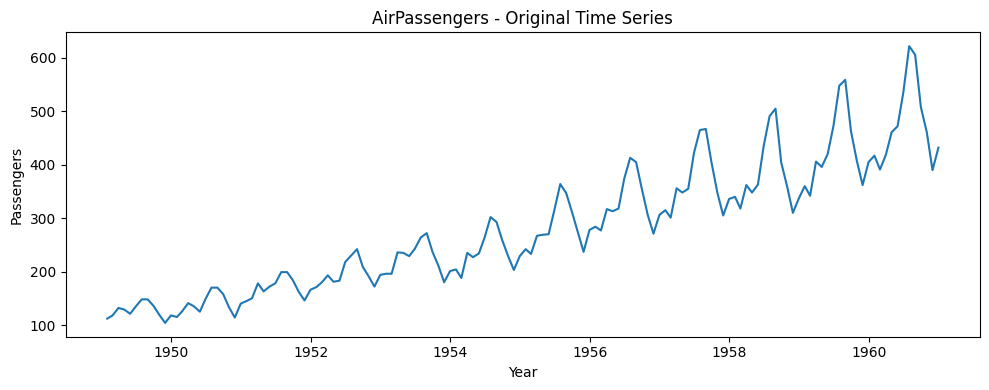

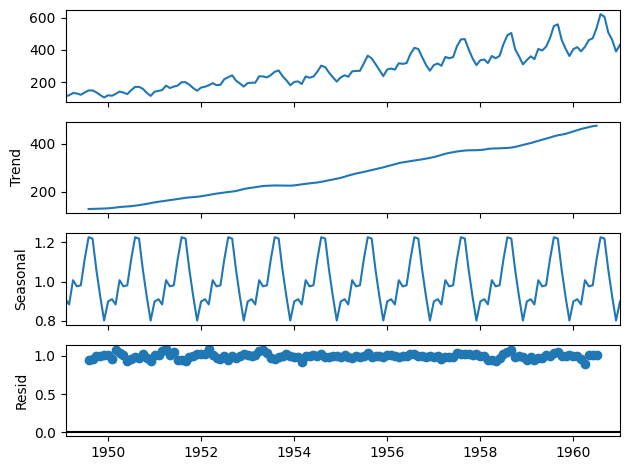

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

values = [
    112,118,132,129,121,135,148,148,136,119,104,118,
    115,126,141,135,125,149,170,170,158,133,114,140,
    145,150,178,163,172,178,199,199,184,162,146,166,
    171,180,193,181,183,218,230,242,209,191,172,194,
    196,196,236,235,229,243,264,272,237,211,180,201,
    204,188,235,227,234,264,302,293,259,229,203,229,
    242,233,267,269,270,315,364,347,312,274,237,278,
    284,277,317,313,318,374,413,405,355,306,271,306,
    315,301,356,348,355,422,465,467,404,347,305,336,
    340,318,362,348,363,435,491,505,404,359,310,337,
    360,342,406,396,420,472,548,559,463,407,362,405,
    417,391,419,461,472,535,622,606,508,461,390,432
]

dates = pd.date_range(start='1949-01', periods=len(values), freq='M')
ts = pd.Series(values, index=dates)

plt.figure(figsize=(10,4))
plt.plot(ts)
plt.title("AirPassengers - Original Time Series")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.tight_layout()
plt.show()

decomp = seasonal_decompose(ts, model='multiplicative', period=12)

decomp.plot()
plt.tight_layout()
plt.show()


**Question 7:** Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.


   trip_distance  fare_amount  anomaly  is_anomaly
0       1.407804     2.642464        1       False
1       9.030364    28.034030        1       False
2       3.950237    15.614760        1       False
3       2.738828    10.907323        1       False
4       0.508875     4.712997        1       False

Number of anomalies detected: 42


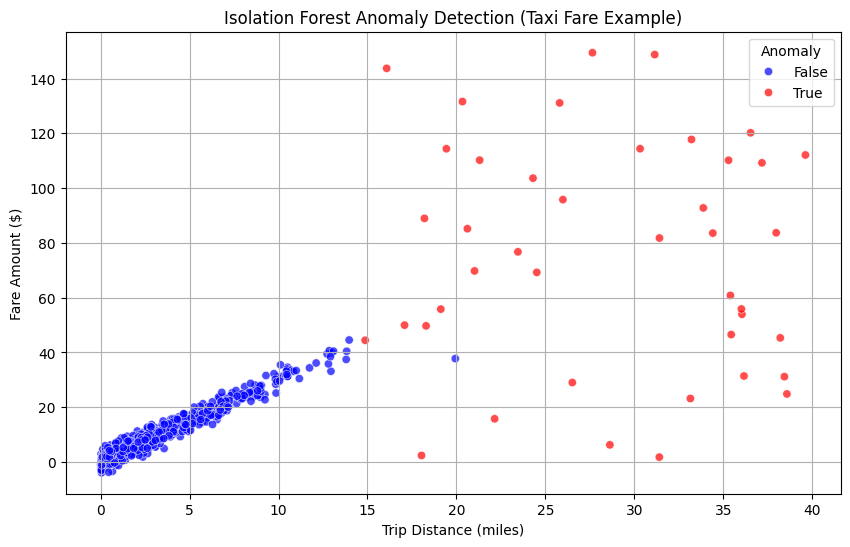

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import seaborn as sns


np.random.seed(42)

n = 800
trip_distance = np.random.exponential(scale=3, size=n)
fare_amount = trip_distance * 3 + np.random.normal(0, 2, n)

anomalies = 40
trip_distance_anom = np.random.uniform(15, 40, anomalies)
fare_amount_anom = np.random.uniform(1, 150, anomalies)

trip_distance_all = np.concatenate([trip_distance, trip_distance_anom])
fare_amount_all = np.concatenate([fare_amount, fare_amount_anom])

df = pd.DataFrame({
    "trip_distance": trip_distance_all,
    "fare_amount": fare_amount_all
})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["trip_distance", "fare_amount"]])

iso = IsolationForest(contamination=0.05, random_state=42)
df["anomaly"] = iso.fit_predict(X_scaled)

df["is_anomaly"] = df["anomaly"] == -1

print(df.head())
print("\nNumber of anomalies detected:", df["is_anomaly"].sum())

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="trip_distance",
    y="fare_amount",
    hue="is_anomaly",
    palette={False: "blue", True: "red"},
    alpha=0.7
)

plt.title("Isolation Forest Anomaly Detection (Taxi Fare Example)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.legend(title="Anomaly")
plt.grid(True)
plt.show()


**Question 8:** Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.


/tmp/ipython-input-623412277.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ap.index = pd.date_range(start="1949-01", periods=len(ap), freq="M")


                                      SARIMAX Results                                       
Dep. Variable:                        AirPassengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -503.024
Date:                              Mon, 24 Nov 2025   AIC                           1020.048
Time:                                      17:23:16   BIC                           1040.174
Sample:                                  01-31-1949   HQIC                          1028.226
                                       - 12-31-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4441      0.388      1.145      0.252      -0.316       1.204
ar.L2          0.32

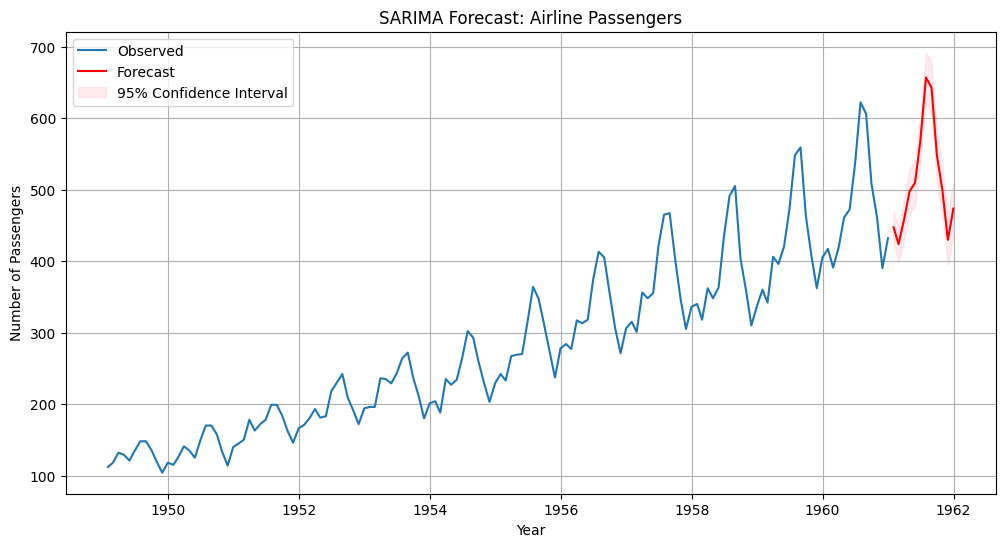

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = sm.datasets.get_rdataset("AirPassengers").data

data['Month'] = pd.to_datetime(data['time'], format='%Y')
from statsmodels.datasets import get_rdataset
ap = get_rdataset("AirPassengers").data
ap.index = pd.date_range(start="1949-01", periods=len(ap), freq="M")
ts = ap['value']
ts.name = "AirPassengers"
model = SARIMAX(ts, order=(2,1,2), seasonal_order=(1,1,1,12))
results = model.fit()

print(results.summary())

forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(ts, label="Observed")
plt.plot(forecast_mean, label="Forecast", color='red')
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.title("SARIMA Forecast: Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()



**Question 9:** Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

Number of anomalies detected: 19
Example of LOF output labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


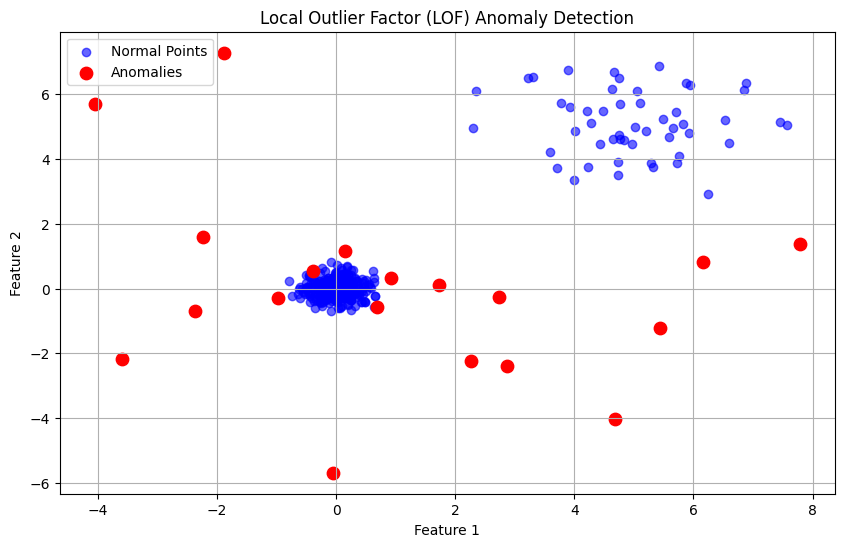

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

X_normal = 0.3 * np.random.randn(300, 2)

X_cluster = np.random.randn(50, 2) + np.array([5, 5])

X_anomalies = np.random.uniform(low=-6, high=8, size=(15, 2))

X = np.vstack([X_normal, X_cluster, X_anomalies])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)

is_anomaly = labels == -1

print("Number of anomalies detected:", sum(is_anomaly))
print("Example of LOF output labels:", labels[:20])

plt.figure(figsize=(10, 6))

plt.scatter(
    X[~is_anomaly, 0], X[~is_anomaly, 1],
    c='blue', label="Normal Points", alpha=0.6
)

plt.scatter(
    X[is_anomaly, 0], X[is_anomaly, 1],
    c='red', label="Anomalies", s=80
)

plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


**Question 10:** You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

-  How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?

- Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

- How would you validate and monitor the performance over time?

- How would this solution help business decisions or operations?


-- **1. Anomaly Detection**

Use Isolation Forest to catch sudden spikes/drops in 15-min energy usage because it is fast and works well for streaming data.

**2. Forecasting**

Use SARIMAX for short-term demand forecasting since it handles seasonality and weather effects.

**3. Monitoring**

Track errors (MAE/RMSE), watch for data drift, and retrain the model regularly.

**4. Business Benefit**

Helps prevent overloads, improves load balancing, reduces costs, and identifies faulty meters or unusual usage.

Anomalies Detected: 14

Forecast next 12 steps:
2024-01-08 00:00:00    199.501199
2024-01-08 00:15:00    199.789394
2024-01-08 00:30:00    200.957604
2024-01-08 00:45:00    205.063301
2024-01-08 01:00:00    203.354135
2024-01-08 01:15:00    204.844018
2024-01-08 01:30:00    207.285861
2024-01-08 01:45:00    208.093294
2024-01-08 02:00:00    222.540755
2024-01-08 02:15:00    212.509235
2024-01-08 02:30:00    213.262484
2024-01-08 02:45:00    213.223183
Freq: 15min, dtype: float64


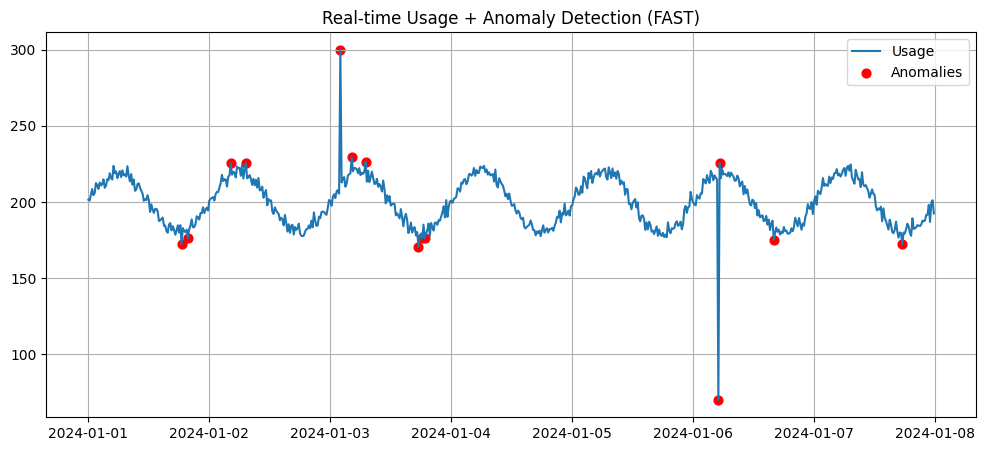

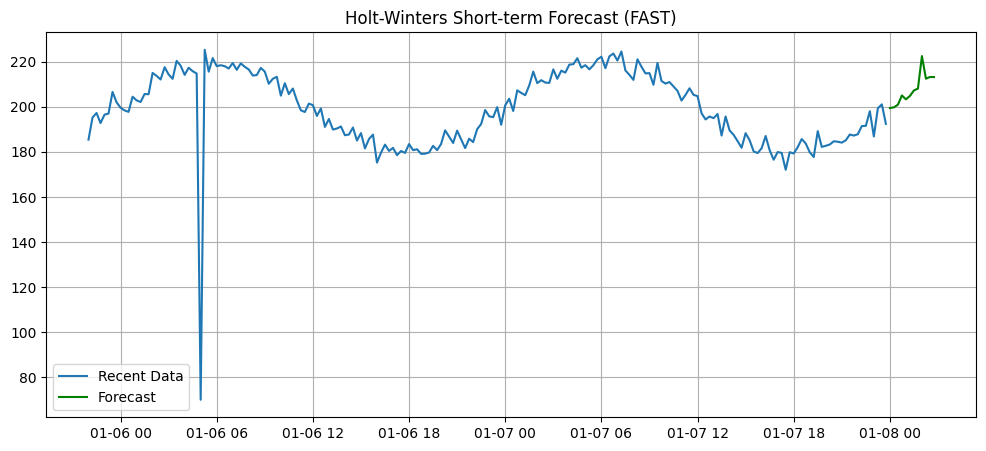

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.holtwinters import ExponentialSmoothing

rng = pd.date_range(start="2024-01-01", periods=7*24*4, freq="15min")
n = len(rng)
np.random.seed(42)
usage = 200 + 20*np.sin(np.arange(n)/96 * 2*np.pi) + np.random.normal(0, 3, n)
usage[200] = 300
usage[500] = 70

df = pd.DataFrame({"usage": usage}, index=rng)

iso = IsolationForest(
    contamination=0.02,
    n_estimators=50,
    max_samples=256,
    random_state=42
)
df["anomaly"] = iso.fit_predict(df[["usage"]])
df["is_anomaly"] = df["anomaly"] == -1

print("Anomalies Detected:", df["is_anomaly"].sum())

model = ExponentialSmoothing(
    df["usage"],
    trend="add",
    seasonal="add",
    seasonal_periods=96
)

fit = model.fit()

forecast = fit.forecast(12)   # Next 3 hours (12 × 15-minute steps)
print("\nForecast next 12 steps:")
print(forecast)

# -----------------------------
# 4. Plot
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(df.index, df["usage"], label="Usage")
plt.scatter(df.index[df["is_anomaly"]],
            df["usage"][df["is_anomaly"]],
            color="red", label="Anomalies", s=40)
plt.title("Real-time Usage + Anomaly Detection (FAST)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df["usage"].iloc[-200:], label="Recent Data")
plt.plot(forecast.index, forecast, label="Forecast", color="green")
plt.title("Holt-Winters Short-term Forecast (FAST)")
plt.legend()
plt.grid(True)
plt.show()
